In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
raw_data = pd.read_csv("Project1_data.csv")
raw_data.head()

,age,job,marital,education,balance,housing,loan,y
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no


In [3]:
raw_data.isna().sum()

age            0
job          311
marital        0
education      0
balance        0
housing        0
loan           0
y             14
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44900 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   y          45197 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [5]:
raw_data = raw_data.dropna(subset=['y'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45197 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45197 non-null  int64 
 1   job        44886 non-null  object
 2   marital    45197 non-null  object
 3   education  45197 non-null  object
 4   balance    45197 non-null  int64 
 5   housing    45197 non-null  object
 6   loan       45197 non-null  object
 7   y          45197 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [6]:
raw_data.isna().sum()

age            0
job          311
marital        0
education      0
balance        0
housing        0
loan           0
y              0
dtype: int64

In [7]:
raw_data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', nan, 'student'], dtype=object)

In [8]:
raw_data['job'] = raw_data['job'].fillna('unknown')
raw_data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
y            0
dtype: int64

In [9]:

train_df, test_df = train_test_split(raw_data, test_size=0.2)

train_df = train_df.reset_index()

test_df = test_df.reset_index()

In [10]:
train_df.describe(include='all')

,index,age,job,marital,education,balance,housing,loan,y
count,36157.000000,36157.000000,36157,36157,36157,36157.000000,36157,36157,36157
unique,NaN,NaN,12,3,4,NaN,2,2,2
top,NaN,NaN,blue-collar,married,secondary,NaN,yes,no,no
freq,NaN,NaN,7776,21781,18607,NaN,20091,30334,31958
mean,22523.887131,40.870205,NaN,NaN,NaN,1324.196366,NaN,NaN,NaN
std,13027.658560,10.742495,NaN,NaN,NaN,3843.534616,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,-99999.000000,NaN,NaN,NaN
25%,11267.000000,33.000000,NaN,NaN,NaN,72.000000,NaN,NaN,NaN
50%,22495.000000,39.000000,NaN,NaN,NaN,446.000000,NaN,NaN,NaN
75%,33757.000000,48.000000,NaN,NaN,NaN,1430.000000,NaN,NaN,NaN


In [11]:
train_df.housing.value_counts()

yes    20091
no     16066
Name: housing, dtype: int64

In [12]:
train_df.loan.value_counts()

no     30334
yes     5823
Name: loan, dtype: int64

In [13]:
cat_columns = ['job','marital','education','housing','loan']

train_cat = train_df[cat_columns]
test_cat = test_df[cat_columns]

train_cat = pd.get_dummies(train_cat)
test_cat = pd.get_dummies(test_cat)

train_df = train_df.drop(columns = cat_columns)
test_df = test_df.drop(columns = cat_columns)


In [14]:
train_df = train_df.join(train_cat)
test_df = test_df.join(train_cat)


In [15]:
train_df['y'] = np.where(train_df['y']=='yes',0,1)
test_df['y'] = np.where(test_df['y']=='yes',0,1)


In [16]:
X_train = train_df.drop(columns=['y'])
Y_train = train_df[['y']]
X_test = test_df.drop(columns=['y'])
Y_test = test_df[['y']]

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)


/Users/akhileshpothuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
predictions = logmodel.predict_proba(X_test)[::,1]

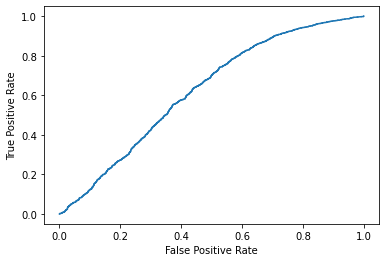

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(Y_test,  predictions)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
predictions = predictions.round()


In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.41      0.02      0.03      1089
           1       0.88      1.00      0.94      7951

    accuracy                           0.88      9040
   macro avg       0.65      0.51      0.48      9040
weighted avg       0.82      0.88      0.83      9040



In [22]:
metrics.confusion_matrix(Y_test, predictions)

array([[  18, 1071],
       [  26, 7925]])